# Customer Segmentation Using K-Means Clustering Algorithm
Author: Jaelani (Jay)

**Content:**
1.   Introduction
2.   Importing Libraries
3.   Dataset Overview
4.   Model Machine Learning




# 1. Introduction

**Dataset Informastion**
*   Dataset ini terdiri dari 4 csv file yaitu customer, store, product dan transaction.
*   Merupakan dummy data untuk studi kasus FMCG dalam kurun waktu 1 tahun yang diambil melalui program membership.

**Attribute Information**
*   Customer
 - `CustomerID`: No Unik Customer
 - `Age`: Usia Customer
 - `Gender`: 0 Wanita, 1 Pria
 - `Marital Status`: Married, Single (Blm menikah/Pernah menikah)
 - `Income` : Pendapatan per bulan dalam jutaan rupiah

*   Store
 - `StoreID`: Kode Unik Store
 - `StoreName`: Nama Toko
 - `GroupStore`: Nama group
 - `Type`: Modern Trade, General Trade
 - `Latitude`: Kode Latitude
 - `Longitude`: Kode Longitude

*   Product
 - `ProductID`: Kode Unik Product
 - `Product Name`: Nama Product
 - `Price`: Harga dlm rupiah

*   Transaction
 - `TransactionID`: Kode Unik Transaksi
 - `Date`: Tanggal transaksi
 - `Qty`: Jumlah item yang dibeli
 - `Total Amount`: Price x Qty

**Company Goals**
*   Kamu adalah seorang Data Scientist di Kalbe Nutritionals dan sedang mendapatkan project baru dari tim marketing.
*   Dari tim marketing, kamu diminta untuk dapat membuat cluster/segment customer berdasarkan beberapa kriteria.

**Objectives**
*   Untuk membuat segment customer.
*   Segment Customer ini nantinya akan digunakan oleh tim marketing untuk memberikan personalized promotion dan sales treatment.








# 2. Importing Libraries


In [ ]:
# Basic
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk machine learning model
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

# 3. Dataset Overview

## 3.1. Reading Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset Kalbe Nutritional - Data Scientist - PBI - Final Project/Merged_Data.csv")
df

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,2022-01-08,P4,12000,3,36000,4,23,1,Single,7.50,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,7.22,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,28.23,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,5.40,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [ ]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


## 3.2. Data Shape

In [ ]:
df.shape

(5020, 19)

## 3.3. Data Correlation Using Heatmap

In [ ]:
df.corr()

,CustomerID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Income,Price_y,Latitude,Longitude
CustomerID,1.000000,-0.016423,-0.009755,-0.024915,0.004129,-0.025952,-0.009947,0.005783,-0.016423,0.002278,-0.003122
Price_x,-0.016423,1.000000,-0.353640,0.440632,-0.032863,0.014693,0.010705,0.001196,1.000000,-0.029008,0.018652
Qty,-0.009755,-0.353640,1.000000,0.621129,0.014365,-0.027768,-0.010542,-0.028425,-0.353640,-0.004170,0.004807
TotalAmount,-0.024915,0.440632,0.621129,1.000000,-0.010722,-0.016900,-0.008774,-0.025350,0.440632,-0.029938,0.025437
StoreID,0.004129,-0.032863,0.014365,-0.010722,1.000000,-0.003872,-0.000189,0.001613,-0.032863,0.471852,-0.094943
Age,-0.025952,0.014693,-0.027768,-0.016900,-0.003872,1.000000,-0.033183,0.486692,0.014693,0.009266,0.015951
Gender,-0.009947,0.010705,-0.010542,-0.008774,-0.000189,-0.033183,1.000000,-0.071443,0.010705,-0.006051,-0.001183
Income,0.005783,0.001196,-0.028425,-0.025350,0.001613,0.486692,-0.071443,1.000000,0.001196,0.015518,0.004385
Price_y,-0.016423,1.000000,-0.353640,0.440632,-0.032863,0.014693,0.010705,0.001196,1.000000,-0.029008,0.018652
Latitude,0.002278,-0.029008,-0.004170,-0.029938,0.471852,0.009266,-0.006051,0.015518,-0.029008,1.000000,-0.395995


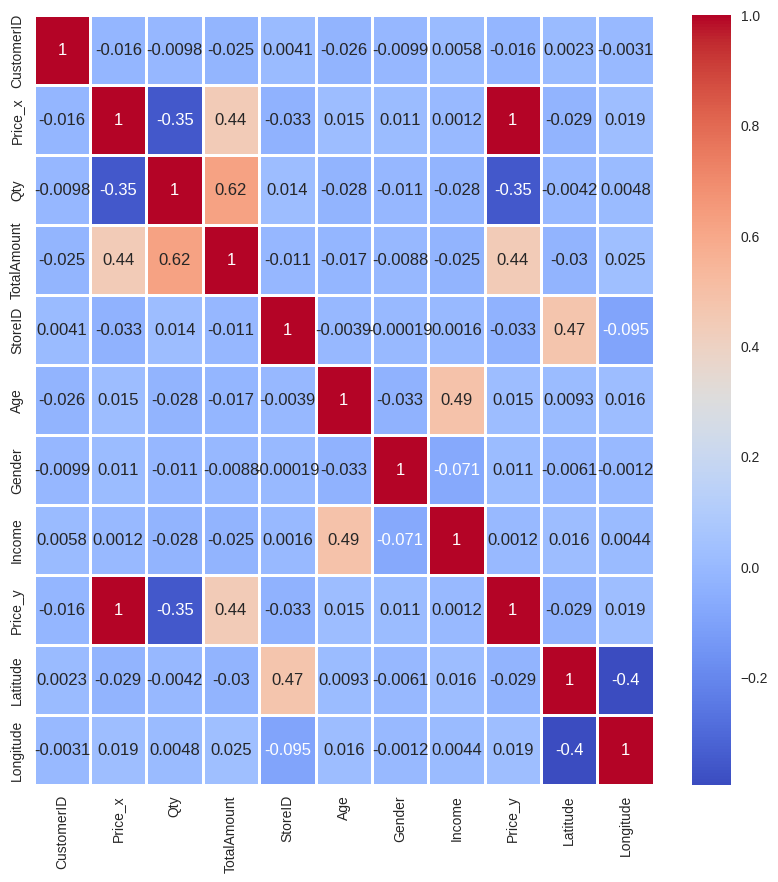

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(),cmap="coolwarm",annot=True,linewidth=2)

## 3.4. Data Aggregation (Data Clustering)

Membuat data baru untuk clustering, yaitu groupby by customerID lalu yang di aggregasi adalah :
*   Transaction id count
*   Qty sum
*   Total amount sum

In [ ]:
df = df.groupby(['CustomerID']).agg({'TransactionID' : 'count','Qty' : 'sum','TotalAmount' : 'sum'}).reset_index()

df.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


# 4. Model MAchine Learning (K-Means Clustering)

## 4.1. Standarize and Normalize Data

In [ ]:
#Standarisasi dataset
X = df.values
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std,columns=df.columns)
df_std.isna().sum()

CustomerID       0
TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [ ]:
#Normalisasi dataset dengan minmaxscaler
X_norm = MinMaxScaler().fit_transform(X)
X_norm

array([[0.        , 0.77777778, 0.72463768, 0.70394911],
       [0.00224215, 0.55555556, 0.68115942, 0.39782666],
       [0.0044843 , 0.66666667, 0.66666667, 0.46925523],
       ...,
       [0.9955157 , 0.83333333, 0.84057971, 0.6561092 ],
       [0.99775785, 0.44444444, 0.46376812, 0.43890803],
       [1.        , 0.55555556, 0.46376812, 0.46011132]])

In [ ]:
# Normalisasi dataset dengan preprocessing sklearn
X_norm2 = preprocessing.normalize(df)
X_norm2

array([[1.60436386e-06, 2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [5.09813912e-06, 3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [6.72344235e-06, 3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [7.57833564e-04, 3.06539419e-05, 1.15803781e-04, 9.99999706e-01],
       [1.05362568e-03, 2.59862836e-05, 9.92203555e-05, 9.99999440e-01],
       [1.01752735e-03, 2.95925181e-05, 9.56065970e-05, 9.99999477e-01]])

In [ ]:
X_std

array([[-1.7281803 ,  1.77981554,  1.49652728,  2.09476796],
       [-1.72043061,  0.54588371,  1.26109285,  0.23926861],
       [-1.71268092,  1.16284962,  1.18261471,  0.67221846],
       ...,
       [ 1.71268092,  2.08829849,  2.12435243,  1.80479599],
       [ 1.72043061, -0.0710822 ,  0.0839207 ,  0.48827502],
       [ 1.7281803 ,  0.54588371,  0.0839207 ,  0.61679446]])

In [ ]:
df_std

,CustomerID,TransactionID,Qty,TotalAmount
0,-1.728180,1.779816,1.496527,2.094768
1,-1.720431,0.545884,1.261093,0.239269
2,-1.712681,1.162850,1.182615,0.672218
3,-1.704931,-0.379565,0.397833,-0.482047
4,-1.697182,-1.305014,-1.093251,-0.754347
...,...,...,...,...
442,1.697182,1.471333,1.418049,0.984681
443,1.704931,2.088298,1.653484,1.728488
444,1.712681,2.088298,2.124352,1.804796
445,1.720431,-0.071082,0.083921,0.488275


In [ ]:
df.drop("CustomerID", axis=1)

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600
...,...,...,...
442,16,59,485100
443,18,62,577700
444,18,68,587200
445,11,42,423300


## 4.2. Elbow Curve Method

In [ ]:
wcss= []
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model1.fit(X_std)
    wcss.append(model1.inertia_)
print(wcss)

[1788.0, 986.0329302884641, 753.8822334868004, 590.196446404552, 497.81515649425023, 422.703886762171, 371.31356121366446, 337.620569261808, 309.34364239691183, 287.21368655562634]


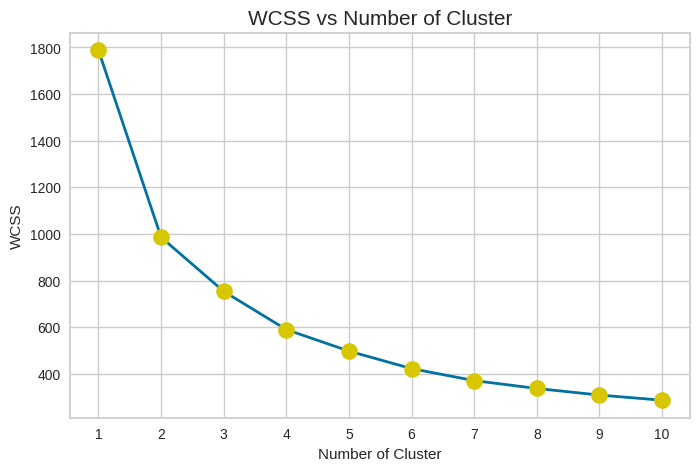

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(list(range(1,11)), wcss, color = 'b', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'y',
         markeredgecolor= 'r')
plt.title('WCSS vs Number of Cluster', fontsize = 15)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.show()

## 4.3. Sillhouette Method

In [ ]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5634425108616966
For n_clusters=3, the silhouette score is 0.5408006989949187
For n_clusters=4, the silhouette score is 0.5201142404920729
For n_clusters=5, the silhouette score is 0.5388948343949318
For n_clusters=6, the silhouette score is 0.5281138669883647
For n_clusters=7, the silhouette score is 0.5371695505890094
For n_clusters=8, the silhouette score is 0.5375429562500206


## 4.4. Clustered Data

In [ ]:
kmeans_3 = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=100)
kmeans_3.fit(X_std)

KMeans(n_clusters=3, n_init=10, random_state=100)

In [ ]:
df['cluster'] = kmeans_3.labels_
df.head()

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,2
1,2,13,57,392300,2
2,3,15,56,446200,2
3,4,10,46,302500,1
4,5,7,27,268600,0


<Figure size 600x600 with 0 Axes>

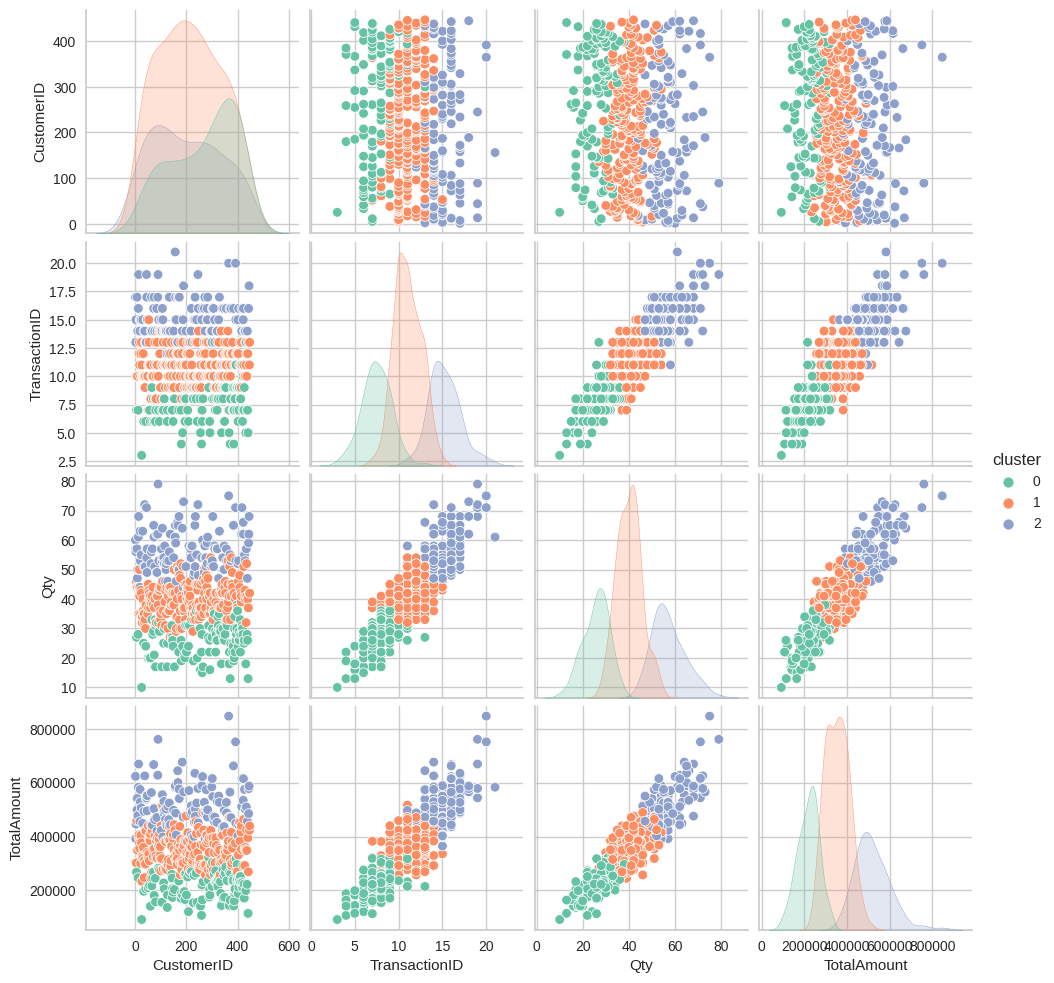

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df,hue='cluster',palette='Set2')
plt.show()


In [ ]:
df['CustomerID'] = df['CustomerID']
df_cluster_mean = df.groupby('cluster').agg({'CustomerID':'count','TransactionID':'mean','Qty':'mean','TotalAmount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
1,217,11.023041,40.073733,353001.382488
2,117,15.239316,57.145299,518861.538462
0,113,7.477876,25.787611,218892.920354


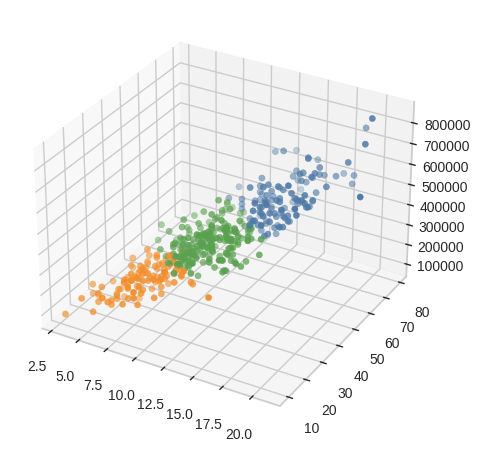

In [ ]:
import matplotlib.colors as mcolors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['TransactionID'])
y = np.array(df['Qty'])
z = np.array(df['TotalAmount'])

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#F28E2B", "#59A14F", "#4E79A7"])
ax.scatter(x, y, z, c=df['cluster'], cmap=cmap)

plt.show()